##<center>**Some Stochastic Processes**

Instalamos el paquete de procesos estocásticos:

[stochasticprocesses 0.15.0](https://pypi.org/project/stochasticprocesses/0.15.0/)

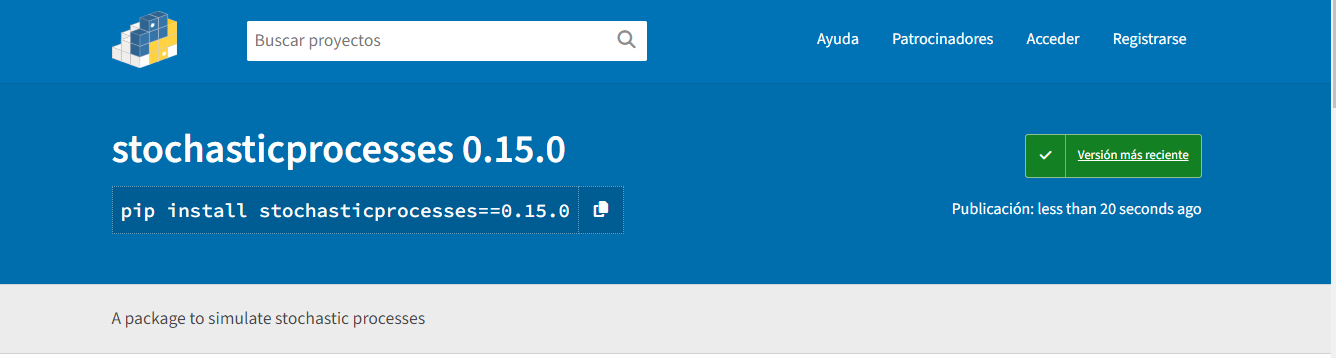

In [ ]:
!pip install mplcyberpunk
!pip install stochasticprocesses==0.15.0

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from stochasticprocesses.simulation import StochasticSimulation
import mplcyberpunk
plt.style.use("cyberpunk")
#sns.set()

# **Movimiento Browniano**

**Definición:**

Un proceso estocástico $\{B(t), t\geq 0\}$  se dice que es un movimoento Browniano si:

1.- $B(0) = 0$

2.- $\{B(t), t\geq 0\}$ tiene incrementos independientes y estacionarios.

3.- Para $t>0$, B(t) tiene distribución normal con media cero y varianza $t$.

In [4]:
# simulation
steps = 100000
n = 100 # paths
bm_sim = StochasticSimulation(steps=steps, n_times=n).BrownianMotion()
bm_sim.shape

(100, 100001)

## **Movimiento Browniano (1-D)**

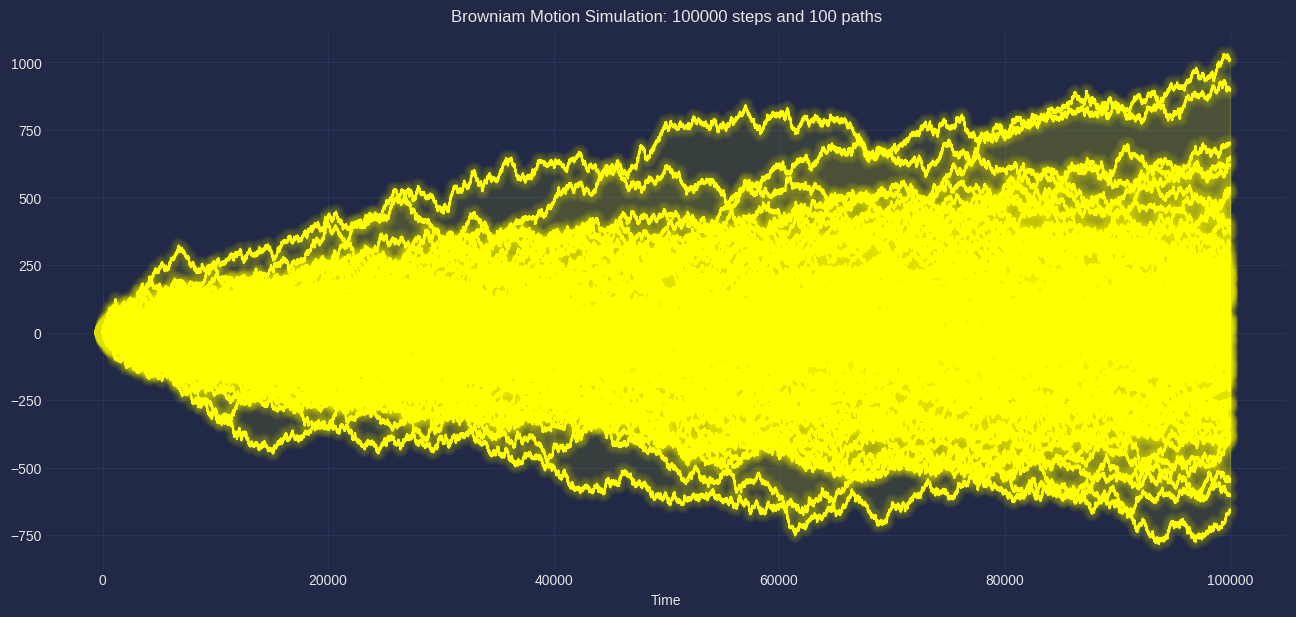

In [5]:
# Brownian motion
plt.figure(figsize=(16,7))
for i in range(bm_sim.shape[0]):
    plt.plot(list(bm_sim.columns), bm_sim.iloc[i][:], color='yellow')
plt.title('Browniam Motion Simulation: {} steps and {} paths'.format(steps, n))
plt.xlabel('Time')
mplcyberpunk.add_glow_effects()
plt.show()

## **Movimiento Browniano (2-D)**

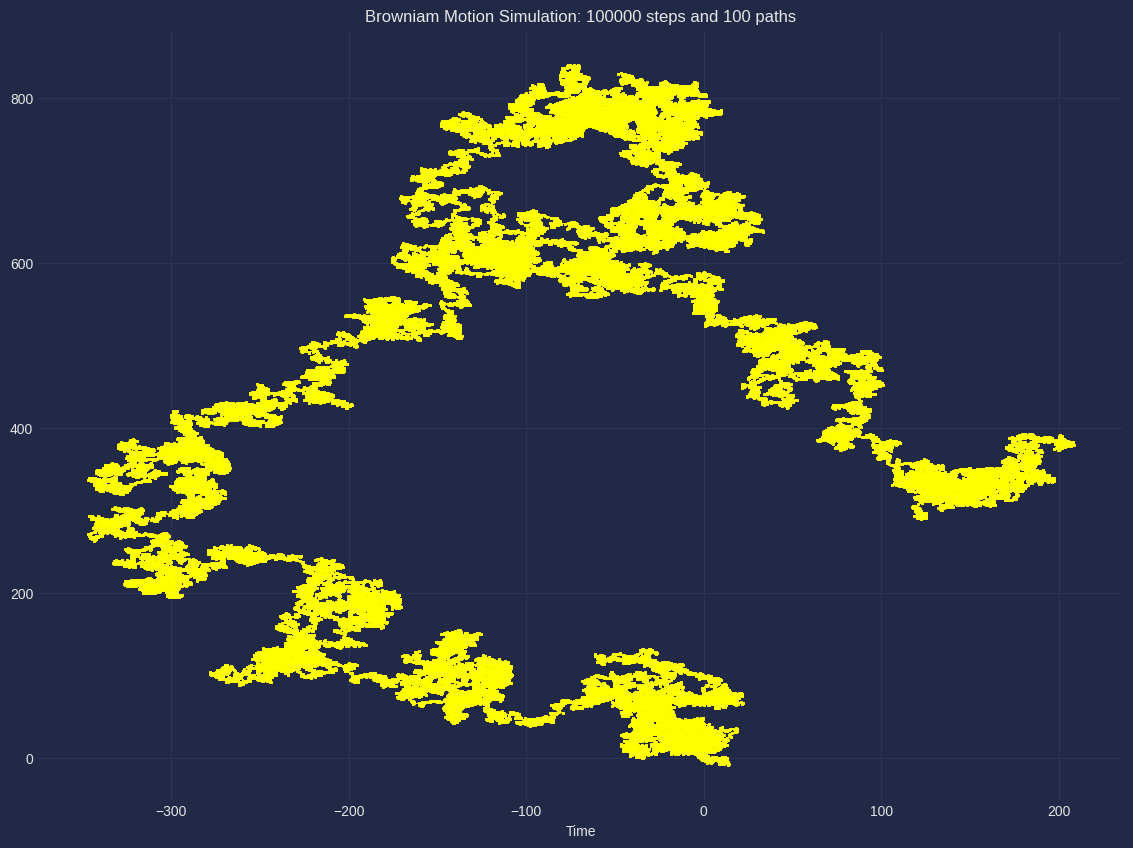

In [6]:
# Brownian Bridge
plt.figure(figsize=(14,10))
for i in range(bm_sim.shape[0]):
    plt.plot(bm_sim.iloc[0][:], bm_sim.iloc[1][:], color='yellow', linewidth=0.4)
    plt.plot(bm_sim.iloc[0][:], bm_sim.iloc[1][:], 'o', color='yellow', markersize=0.4)
plt.title('Browniam Motion Simulation: {} steps and {} paths'.format(steps, n))
plt.xlabel('Time')
#mplcyberpunk.add_glow_effects()
plt.show()

# **Puente Browniano**

**Definición:**

Un procesos estocástico $\{X(t)= B(t) - \frac{t}{T} B(T) , 0 \leq t \leq T \}$,  es un puente Browniano si satisface las siguientes propiedades:

1.- $X(0)=X(T)=0$

2.- $X(t)$ se distribuye como una normal con media cero y varianza $t(1-t/T)$

$$E(X(t)) = 0$$,  y $$Var(X(t)) = t(1-t/T)$$

3.- $Cov(X(s), X(t)) = min(s, t) - \frac{st}{T}$

In [7]:
# simulation
steps = 100000
n = 100 # paths
bm_sim = StochasticSimulation(steps=steps, n_times=n).BrownianBridge()
bm_sim.shape

(100, 100001)

## **Puente Browniano (1-D)**

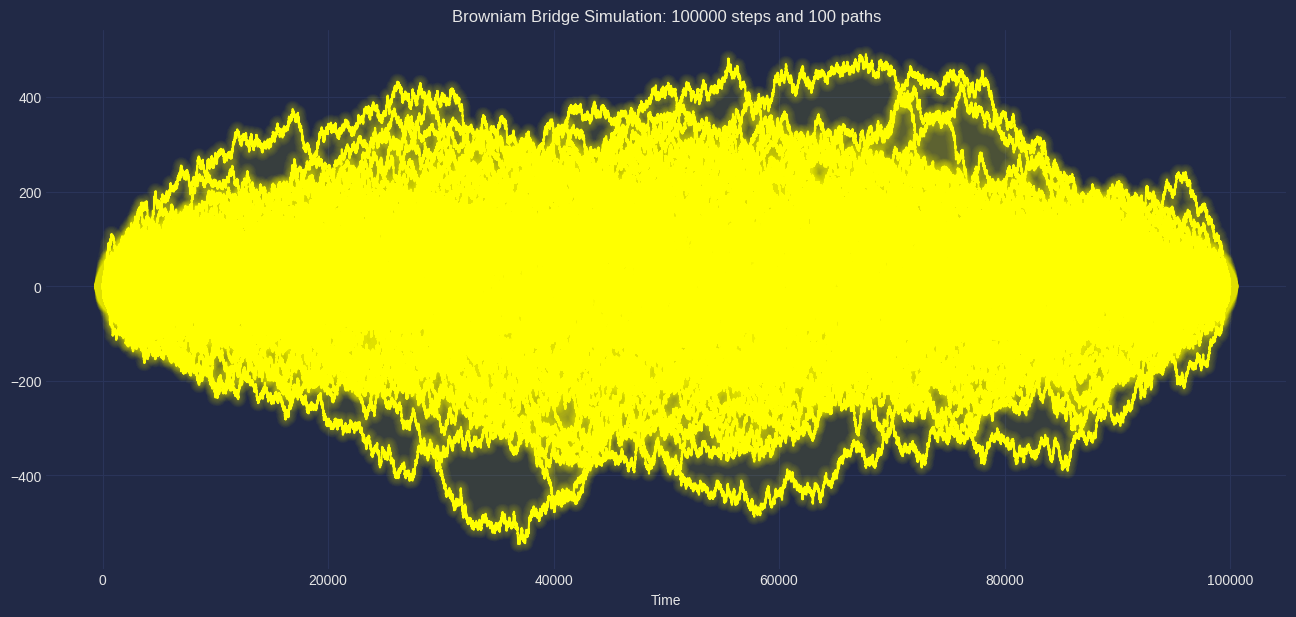

In [8]:
# Brownian Bridge
plt.figure(figsize=(16,7))
for i in range(bm_sim.shape[0]):
    plt.plot(list(bm_sim.columns), bm_sim.iloc[i][:], color='yellow')
plt.title('Browniam Bridge Simulation: {} steps and {} paths'.format(steps, n))
plt.xlabel('Time')
mplcyberpunk.add_glow_effects()
plt.show()

## **Puente Browniano (2-D)**

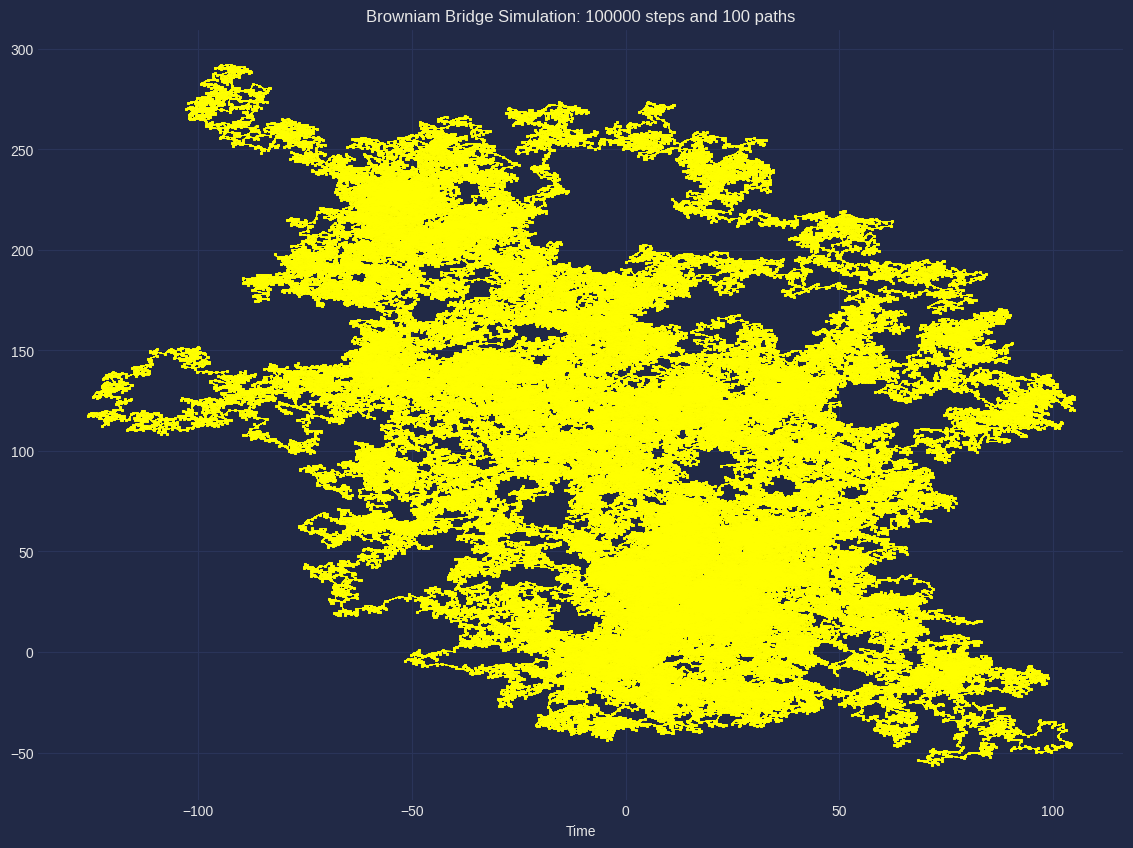

In [9]:
# Brownian Bridge
plt.figure(figsize=(14,10))
for i in range(bm_sim.shape[0]):
    plt.plot(bm_sim.iloc[0][:], bm_sim.iloc[1][:], color='yellow', linewidth=0.4)
    plt.plot(bm_sim.iloc[0][:], bm_sim.iloc[1][:], 'o', color='yellow', markersize=0.4)
plt.title('Browniam Bridge Simulation: {} steps and {} paths'.format(steps, n))
plt.xlabel('Time')
#mplcyberpunk.add_glow_effects()
plt.show()

# **Caminata aleatoria simple**

La caminata aleatoria en $\mathbb{Z}$, es la más simple de todas, de ahí su nombre. $X_i$ toma valores en $\{−1,1\}$, y la caminata comienza en $S_n = 0$ y está definida para valores enteros. Las probabilidades de ir a la derecha o a la izquierda se denotan como $P(X_i=1)$ y $P(X_i=-1)$, respectivamente, con las siguientes probabilidades para el caso de una caminata aleatoria simétrica:


\begin{equation*}
P(X_i=1)=P(X_i=−1)=1/2
\end{equation*}


Considerando el caso más general, se tiene que el caminante puede ir a la derecha con probabilidad $p$, y a la izquierda con probabilidad $1-p$


\begin{equation*}
P(X_i=1)=p \ \text{  y  } \  P(X_i=−1)=1−p
\end{equation*}

In [10]:
# simulation
steps = 100000
n = 100 # paths
bm_sim = StochasticSimulation(steps=steps, n_times=n).SimpleRandomWalk(p=0.5)
bm_sim.shape

(100, 100001)

## **Caminata Aleatoria Simple (1-D)**

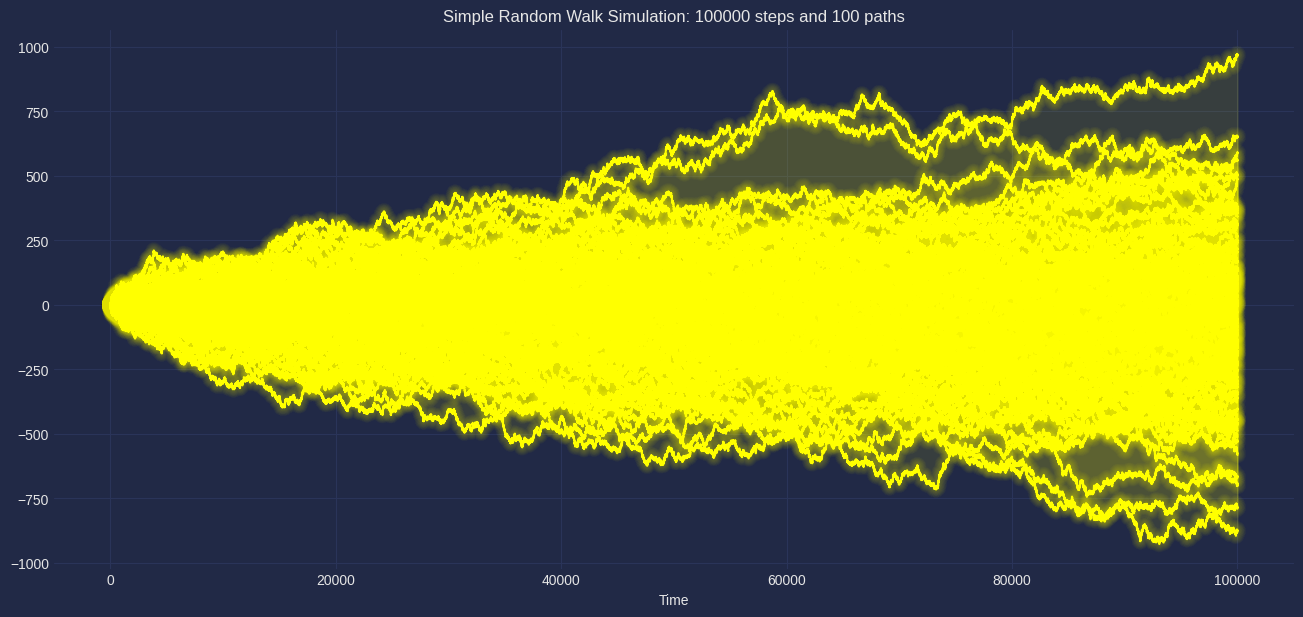

In [11]:
# Simple Random Walk
plt.figure(figsize=(16,7))
for i in range(bm_sim.shape[0]):
    plt.plot(list(bm_sim.columns), bm_sim.iloc[i][:], color='yellow')
plt.title('Simple Random Walk Simulation: {} steps and {} paths'.format(steps, n))
plt.xlabel('Time')
mplcyberpunk.add_glow_effects()
plt.show()

## **Caminata Aleatoria Simple (2-D)**

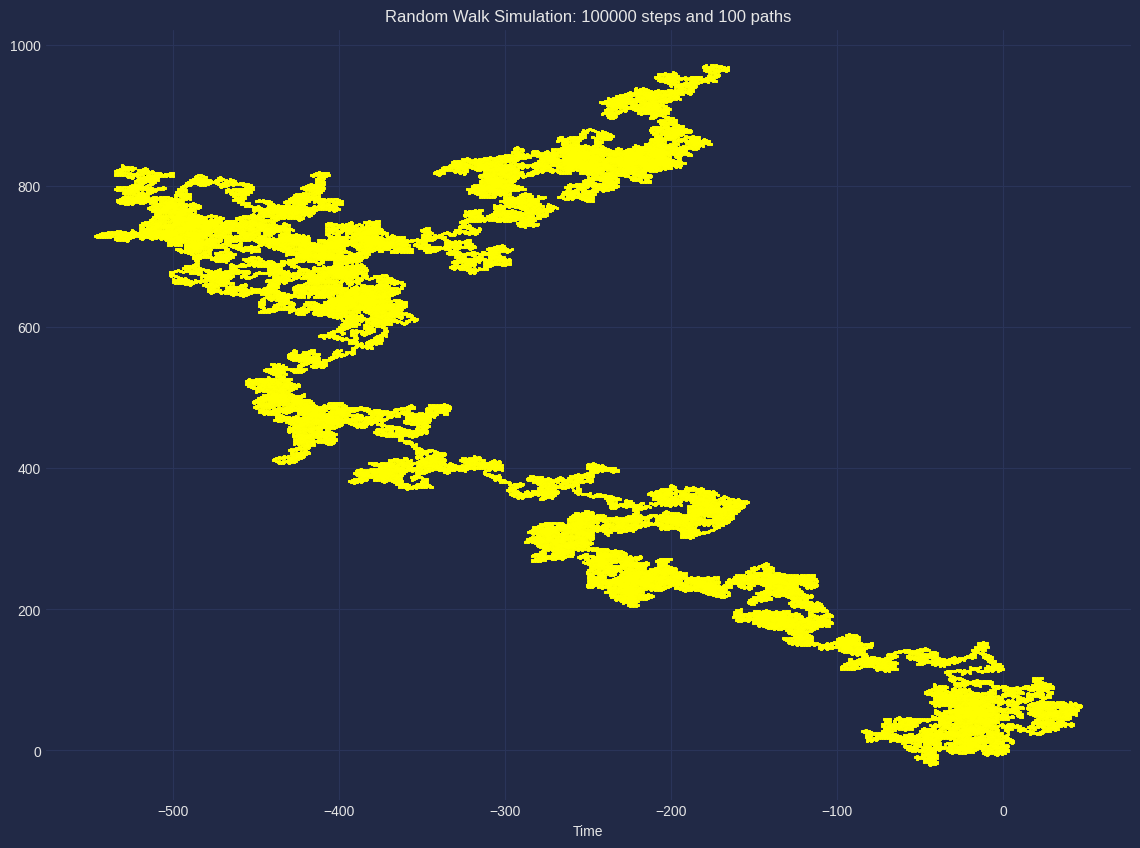

In [12]:
# Brownian Bridge
plt.figure(figsize=(14,10))
for i in range(bm_sim.shape[0]):
    plt.plot(bm_sim.iloc[0][:], bm_sim.iloc[1][:], color='yellow', linewidth=0.4)
    plt.plot(bm_sim.iloc[0][:], bm_sim.iloc[1][:], 'o', color='yellow', markersize=0.4)
plt.title('Random Walk Simulation: {} steps and {} paths'.format(steps, n))
plt.xlabel('Time')
#mplcyberpunk.add_glow_effects()
plt.show()

# **Movimiento Browniano con deriva y volatilidad**

**Definición:**

Sea $\{B(t), t \geq 0\}$ un movimiento Browniano estándar. El procesos estocástico $\{X(t)= \mu t + \sigma B(t), t \geq 0\}$ recibe el nombre de movimiento Browniano con coeficiente de deriva (drift) $\mu$, y coeficiente de volatilidad (o difusión) $\sigma$.

**Poposición**

La distribucuión de $X(t)$ es normal con media $\mu t$, y varianza $\sigma^2 t$. Y la covarianza entre $X(s)$ y $X(t)$ es
$$Cov(X(s), X(t)) = \sigma^2 min(s, t)$$.

In [13]:
# simulación
steps = 100000
n = 100 # paths
bmd_sim = StochasticSimulation(steps=steps, n_times=n).BrownianMotionDrift(mu=1.4, sigma=0.8)
bmd_sim.shape

(100, 100001)

## **Movimiento Browniano con deriva y volatilidad (1-D)**

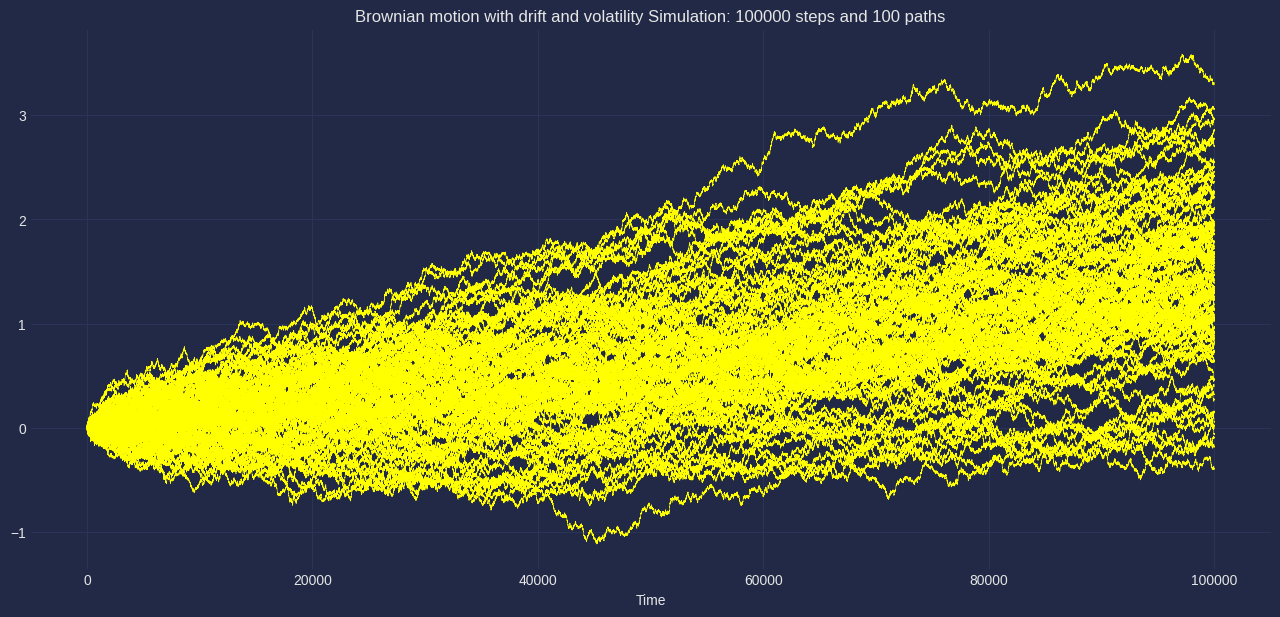

In [14]:
# Brownian motion with drift and volatility
plt.figure(figsize=(16,7))
for i in range(bmd_sim.shape[0]):
    plt.plot(list(bmd_sim.columns), bmd_sim.iloc[i][:], color='yellow', linewidth=0.4)
plt.title('Brownian motion with drift and volatility Simulation: {} steps and {} paths'.format(steps, n))
plt.xlabel('Time')
#mplcyberpunk.add_glow_effects()
plt.show()

## **Movimiento Browniano con deriva y volatilidad (2-D)**



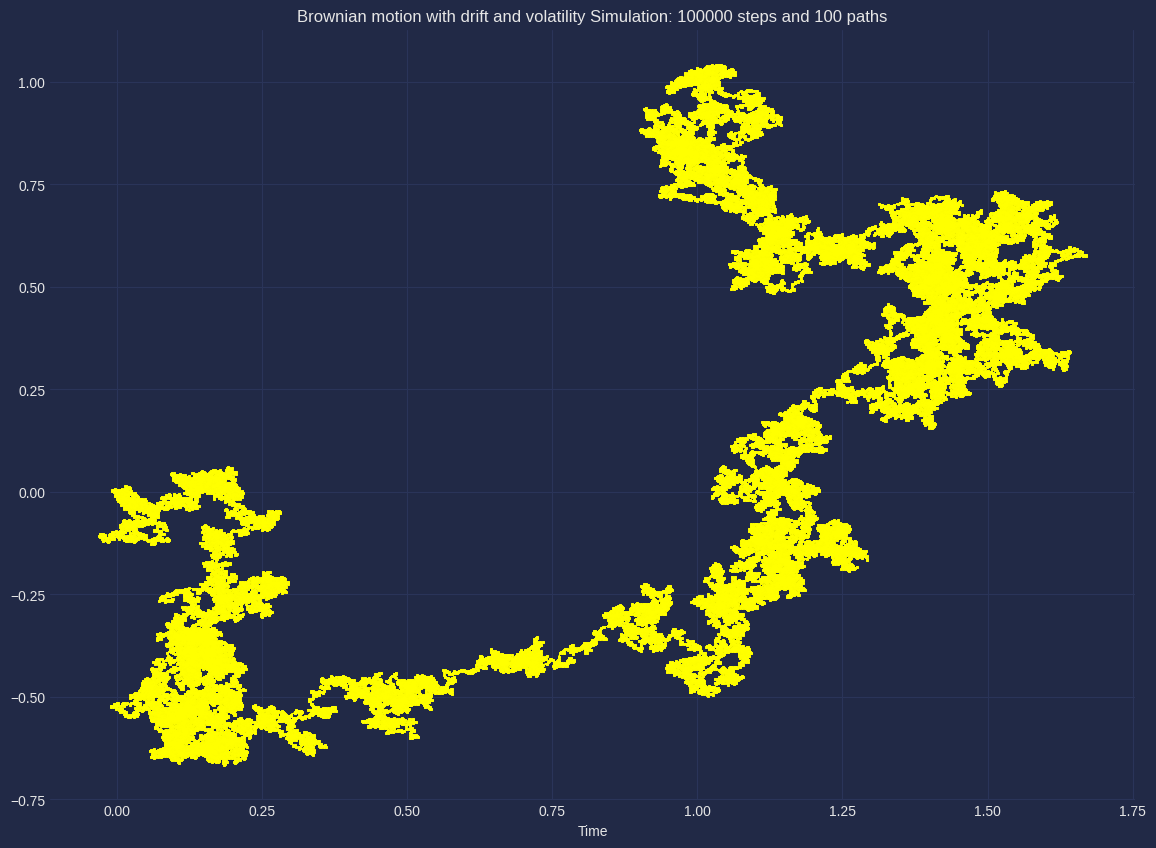

In [15]:
# Brownian motion with drift and volatility
plt.figure(figsize=(14,10))
for i in range(bmd_sim.shape[0]):
  plt.plot(bmd_sim.iloc[0][:], bmd_sim.iloc[1][:], color='yellow', linewidth=0.4)
  plt.plot(bmd_sim.iloc[0][:], bmd_sim.iloc[1][:], 'o', color='yellow', markersize=0.4)
plt.title('Brownian motion with drift and volatility Simulation: {} steps and {} paths'.format(steps, n))
plt.xlabel('Time')
#mplcyberpunk.add_glow_effects()
plt.show()

# **Movimiento Browniano Geométrico**

## Definición:

Sea $\{W(t), t\geq 0\}$ es un movimiento Browniano estándar (Proceso de Wiener),  el proceso estocástico $\{S(t)= S(0) \exp\{(\mu t - \sigma^2/2)t + \sigma W(t)\}, S(0)=S_0, t\geq 0\}$ es un movimiento Browniano geométrico con valor esperado y varianza:

\begin{eqnarray}
E[S(t)] & = & S_0 e^{\mu t}, \ \ y \\
Var(S(t)) & = & S_0^2 \left(e^{2\mu t}\right) \left(e^{\sigma^2 t} -1 \right)
\end{eqnarray}

In [16]:
# simulation
steps = 100000
n = 100 # paths
S0 = 7.1
alpha=0.3
beta=0.08
gbm_sim = StochasticSimulation(steps=steps, n_times=n).GeometricBrownianMotion(S0=S0, alpha=alpha, beta=beta)
gbm_sim.shape

(100, 100001)

## **Movimiento Browniano Geométrico (1-D)**

*   Elemento de la lista
*   Elemento de la lista



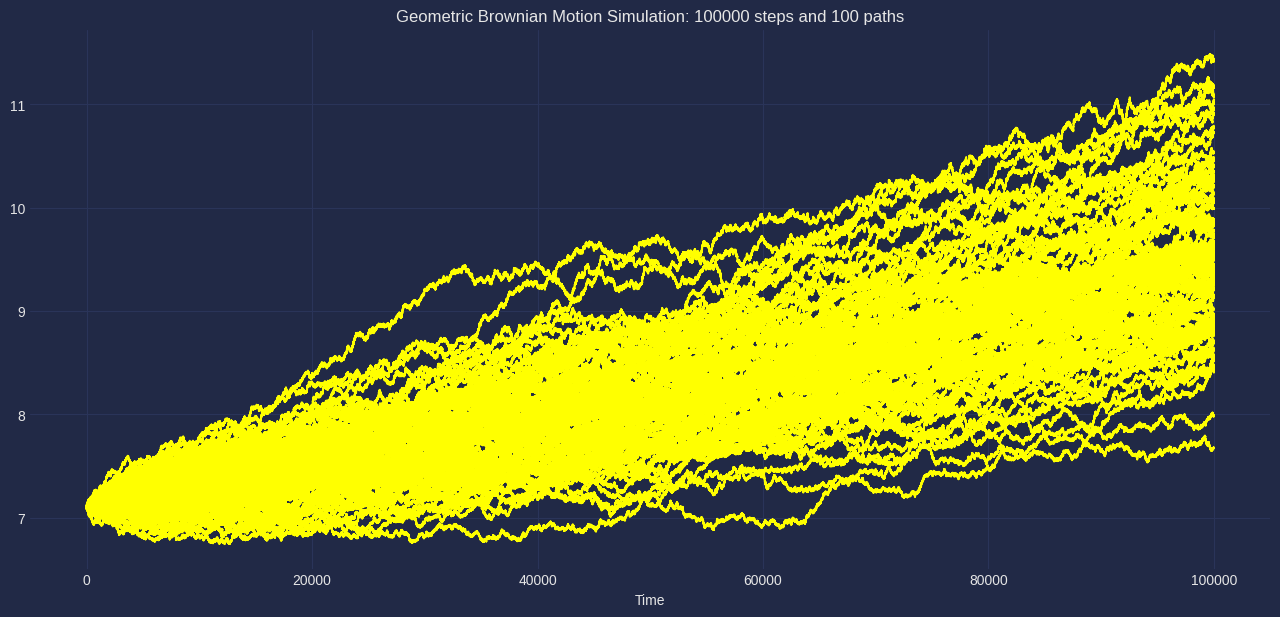

In [17]:
# Geometric Brownian motion
plt.figure(figsize=(16,7))
for i in range(gbm_sim.shape[0]):
    plt.plot(list(gbm_sim.columns), gbm_sim.iloc[i][:], color='yellow')
plt.title('Geometric Brownian Motion Simulation: {} steps and {} paths'.format(steps, n))
plt.xlabel('Time')
#mplcyberpunk.add_glow_effects()
plt.show()

## **Movimiento Browniano Geométrico (2-D)**

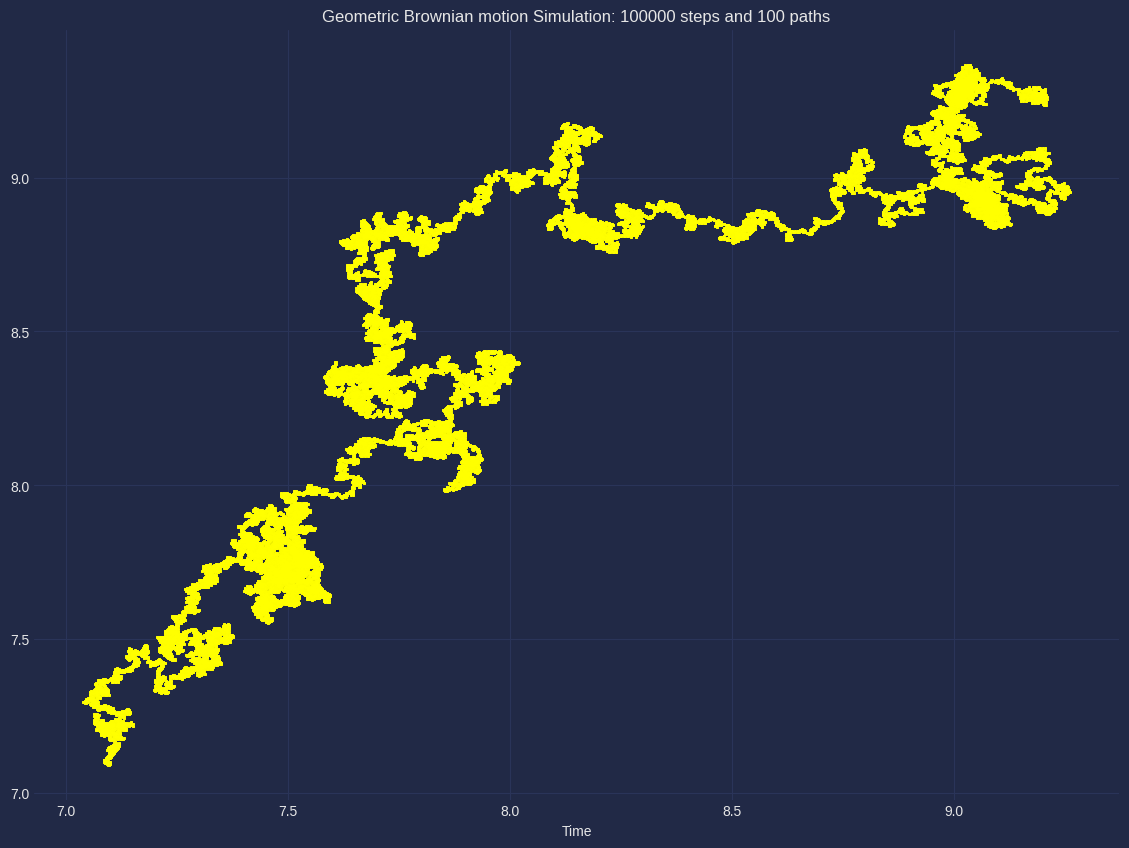

In [18]:
# Geometric Brownian Motion
plt.figure(figsize=(14,10))
for i in range(gbm_sim.shape[0]):
  plt.plot(gbm_sim.iloc[0][:], gbm_sim.iloc[1][:], color='yellow', linewidth=0.4)
  plt.plot(gbm_sim.iloc[0][:], gbm_sim.iloc[1][:], 'o', color='yellow', markersize=0.4)
plt.title('Geometric Brownian motion Simulation: {} steps and {} paths'.format(steps, n))
plt.xlabel('Time')
#mplcyberpunk.add_glow_effects()
plt.show()